Assignment 4 

#1

In [ ]:
import pandas as pd
import numpy as np
import requests
from numpy.linalg import norm

In [ ]:
# return the function for a,b
def f(a,b):
    r = float(requests.get(f"http://ramcdougal.com/cgi-bin/error_function.py?a={a}&b={b}", headers={"User-Agent": "MyScript"}).text)
    return r

In [ ]:
#a = 0.4
#b = 0.2
#check the function 
f(0.4, 0.2)

In [ ]:
# f(a,b) with repsect to  a
def df_a(a, b, h):
    return (f(a + h,b) - f(a,b))/h
    
# f(a,b) with repsect to  b   
def df_b(a, b, h):
    return (f(a,b + h) - f(a,b))/h

# 2-dimension vector + a & b
def df_grad(a, b, h):
    return np.array([df_a(a, b, h), df_b(a, b, h)]) 

In [ ]:
def grad_descent_2D(unit_est, gamma, h, threshold):
    prevent_est = unit_est - 10 * threshold
    est = unit_est
    
    est_a = []
    est_b = []
    f_result = []
    iter = 0
    max_value = 10000
    # breaks the loop when min & max values are met
    while norm(est - prevent_est) > threshold and iter < max_value:
        prevent_est = est
        # f(a,b) decreases 
        est = est - gamma * df_grad(est[0], est[1], h)
        est_a.append(est[0])
        est_b.append(est[1])
        f_result.append(f(est[0], est[1]))
        iter = iter + 1
        
    print (f"Minimum value {f_result[-1]} when  a = {est_a[-1]}, b = {est_b[-1]}.")
    
    

In [ ]:
#test function
delta = 1e-4
learning_rate = 0.1 #common learning rate are 0.01, 0.0001, 0.05, 0.1
a = 0.4
b = 0.8
#local min
grad_descent_2D(np.array([a, b]), learning_rate, delta, 1e-8)
#global min
grad_descent_2D(np.array([b, a]), learning_rate, delta, 1e-8)

In [ ]:
#test function
delta = 1e-4
learning_rate = 0.1 #common learning rate are 0.01, 0.0001, 0.05, 0.1
a = 0.999
b = 0.001
#local min
grad_descent_2D(np.array([a, b]), learning_rate, delta, 1e-8)
#global min
grad_descent_2D(np.array([b, a]), learning_rate, delta, 1e-8)

In [ ]:
#test function
delta = 1e-4
learning_rate = 0.1 #common learning rate are 0.01, 0.0001, 0.05, 0.1
a = 0.001
b = 0.999
#local min
grad_descent_2D(np.array([a, b]), learning_rate, delta, 1e-8)
#global min
grad_descent_2D(np.array([b, a]), learning_rate, delta, 1e-8)

#2

In [ ]:
conda install -c conda-forge cartopy

In [6]:
import pandas as pd 
import random
import numpy as np
import time
from math import radians, cos, sin, asin, sqrt

In [7]:
df_cities = pd.read_csv("/Users/polina/Desktop/worldcities.csv")
df_cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519


In [8]:
df = df_cities[['lat', 'lng']]
df

,lat,lng
0,35.6839,139.7744
1,-6.2146,106.8451
2,28.6667,77.2167
3,14.6000,120.9833
4,-23.5504,-46.6339
...,...,...
42900,57.3670,139.5000
42901,63.6667,71.3333
42902,81.7166,-17.8000
42903,62.5333,-42.2167


In [9]:
#cheet sheet
#https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [10]:
#cheet sheet
def centers(df, k):
    pts = [np.array(pt) for pt in zip(df['lat'], df['lng'])]
    centers = random.sample(pts, k)
    
    old_cluster_ids, cluster_ids = None, [] # arbitrary but different
    
    while cluster_ids != old_cluster_ids:
        old_cluster_ids = list(cluster_ids)
        cluster_ids = []
        for pt in pts:
            min_cluster = - 1
            min_dist = float('inf')
            for i, center in enumerate(centers):
                dist = haversine(pt[1], pt[0], center[1], center[0])
                if dist < min_dist:
                    min_cluster = i
                    min_dist = dist
            cluster_ids.append(min_cluster)
        df['cluster'] = cluster_ids
        cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
                        for match in range(k)]
        centers = [sum(pts)/len(pts) for pts in cluster_pts]
        
    return df['cluster']

In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [ ]:
!pip install basemap
!pip install basemap-data

In [12]:
lngs = list(df['lng'])
lats = list(df['lat'])

In [ ]:
conda install basemap

In [13]:
# https://matplotlib.org/basemap/users/robin.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html
#https://matplotlib.org/basemap/users/examples.html
def draw_figure(cluster,k):
    plt.figure(figsize=(15,9))
    map = Basemap(projection='robin', lat_0 = 0, lon_0 = 0, resolution = 'c')
    # draw coastlines.
    map.drawcoastlines()
    # convert to map projection coordinates.
    x, y = map(lngs, lats)
    map.scatter(x, y, c = cluster, cmap = 'jet', s = 0.6, alpha = 0.3 )
    map.drawmapboundary(fill_color='aqua')
    plt.show()

In [14]:
# record the runtime of k-means cluster.
def run_time(k):
    times = []
    start = time.time()
    cluster = list(centers(df,k))
    end = time.time()
    times.append(end - start)
    print (f"k = {k} the run time is {times[0]} second.")
    return cluster

/var/folders/hk/6h27swj52gvfmxfwhdkmrw7c0000gn/T/ipykernel_13517/2540725444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_ids


k = 5 the run time is 6.004141092300415 second.


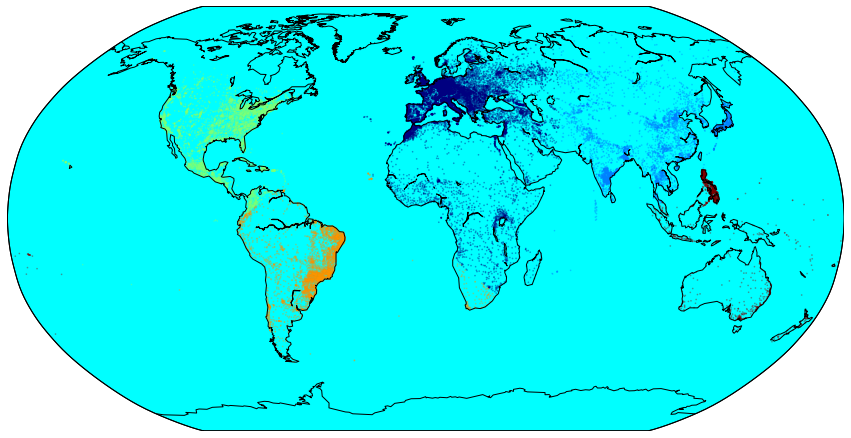

/var/folders/hk/6h27swj52gvfmxfwhdkmrw7c0000gn/T/ipykernel_13517/2540725444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_ids


k = 7 the run time is 5.943784952163696 second.


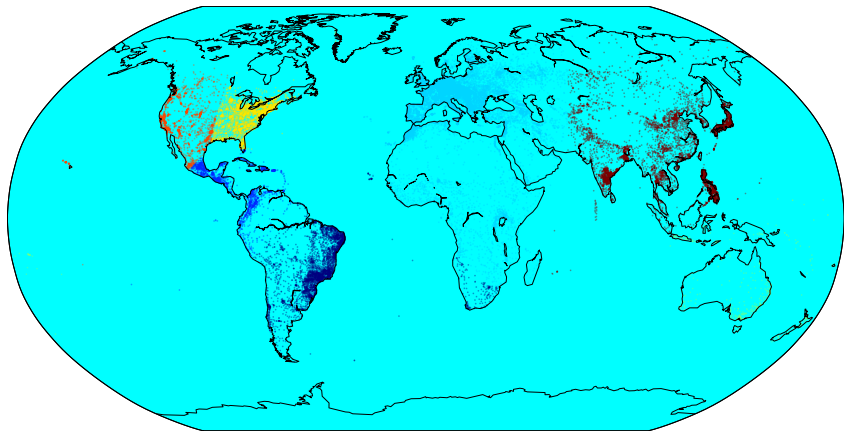

/var/folders/hk/6h27swj52gvfmxfwhdkmrw7c0000gn/T/ipykernel_13517/2540725444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_ids


k = 15 the run time is 48.09473514556885 second.


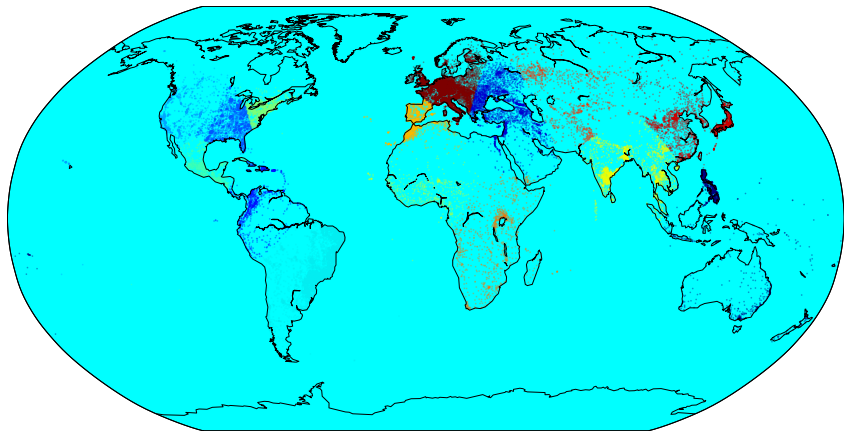

/var/folders/hk/6h27swj52gvfmxfwhdkmrw7c0000gn/T/ipykernel_13517/2540725444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_ids


k = 5 the run time is 4.352913856506348 second.


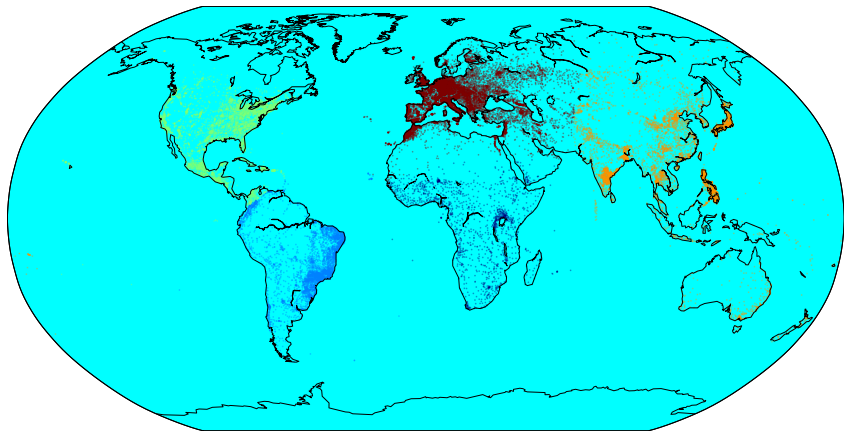

/var/folders/hk/6h27swj52gvfmxfwhdkmrw7c0000gn/T/ipykernel_13517/2540725444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_ids


k = 7 the run time is 11.31380820274353 second.


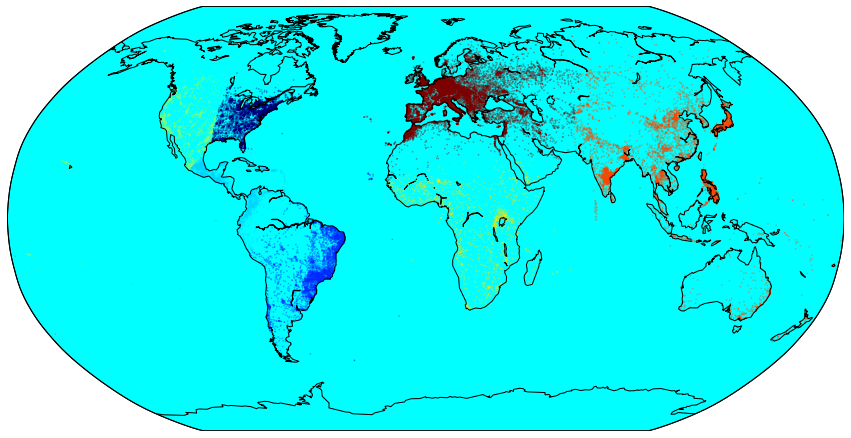

/var/folders/hk/6h27swj52gvfmxfwhdkmrw7c0000gn/T/ipykernel_13517/2540725444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_ids


k = 15 the run time is 35.65637826919556 second.


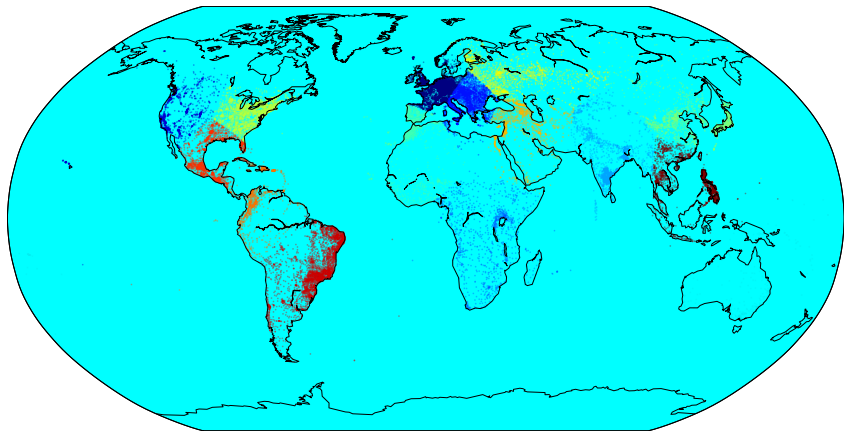

/var/folders/hk/6h27swj52gvfmxfwhdkmrw7c0000gn/T/ipykernel_13517/2540725444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_ids


k = 5 the run time is 11.364264965057373 second.


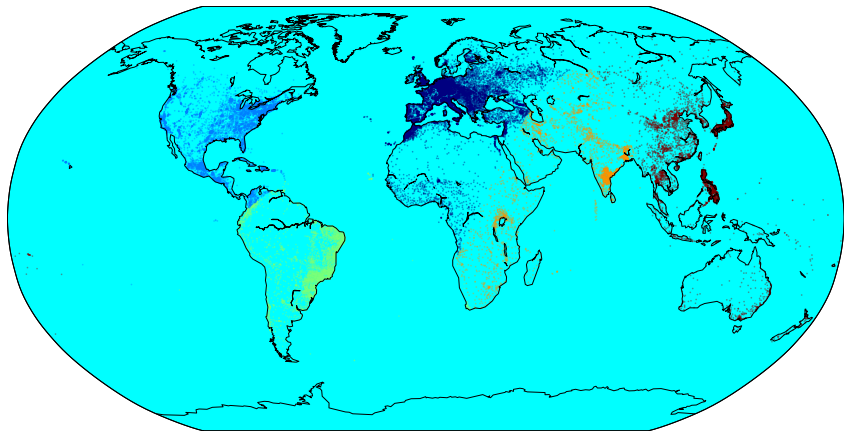

/var/folders/hk/6h27swj52gvfmxfwhdkmrw7c0000gn/T/ipykernel_13517/2540725444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_ids


k = 7 the run time is 11.818651914596558 second.


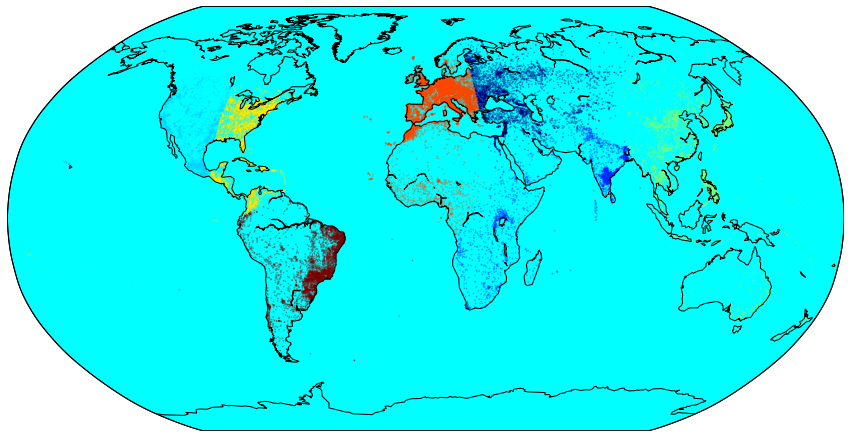

/var/folders/hk/6h27swj52gvfmxfwhdkmrw7c0000gn/T/ipykernel_13517/2540725444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_ids


k = 15 the run time is 18.866423845291138 second.


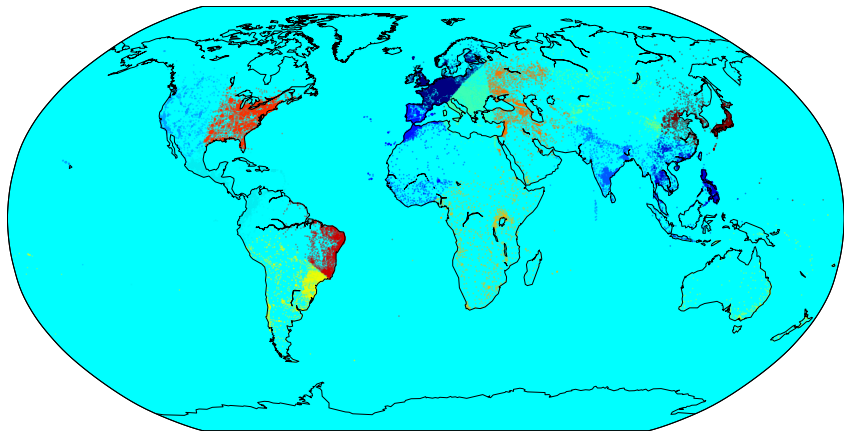

In [15]:
for count in range(3):
    cluster_k_5 = run_time(5)
    draw_figure(cluster_k_5,5)
    cluster_k_7 = run_time(7)
    draw_figure(cluster_k_7,7)
    cluster_k_15 = run_time(15)
    draw_figure(cluster_k_15,15)

#3

In [ ]:
import time
import plotnine as p9
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt

In [ ]:
def fibonacci(n):
    # precodition: n an integer >= 1
    if n == 1 or n == 2:
        return 1
    return fibonacci(n-1) + fibonacci(n-2)

In [ ]:
# test function
print("n = 10, should be 55:", fibonacci(10))

In [ ]:
def timeit(function, *args, n=3):
    times = []
    for i in range(n):
        start = time.time()
        function(*args)
        end = time.time()
        times.append(time.time() - start)
    return min(times)

In [ ]:
fibonacci_time = []
lru_time = []

ns = range(1, 40)
times = [timeit(fibonacci, n) for n in tqdm(ns)] 
(p9.ggplot(pd.DataFrame({'n': ns, 'time (s)': times}),
            p9.aes(x='n', y='time (s)'))
+ p9.geom_point()
+ p9.scale_x_continuous(trans='log10')
+ p9.scale_y_continuous(trans='log10')).draw()

In [ ]:
from functools import lru_cache

@lru_cache()
def fibonacci_lru(n):
    # preconditions: n an integer >= 1
    if n in (1, 2):
        return 1
    return r(n - 1) + r(n - 2)

In [ ]:
# test function
print("n = 10, should be 55:", fibonacci_lru(10))

In [ ]:
ns = range(1, 4000)
times = [timeit(fibonacci_lru, n) for n in tqdm(ns)] 
(p9.ggplot(pd.DataFrame({'n': ns, 'time (s)': times}),
            p9.aes(x='n', y='time (s)'))
+ p9.geom_point()
+ p9.scale_x_continuous(trans='log10'))

#4

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# dot diagram code from slides + https://tiefenauer.github.io/blog/smith-waterman/
def matrix_grid(seq1, seq2, match_score, mismatch, gap_cost):
    # initialize grid
    matrix = np.zeros((len(seq1) +1, len(seq2)+1),int) #np.int
   
    # store max score and coordinates
    max_score = 0
    max_i = 0
    max_j = 0
    
    for i, base1 in enumerate(seq1): 
        for j, base2 in enumerate(seq2):
            if base1 == base2:
                
                if i > 0 and j > 1:
                     matrix[i,j] = max( matrix[i,j],matrix[i-1,j-1] + match_score,matrix[i-1, j-2]+match_score-gap_cost)
                elif i > 0 and j > 0:
                     matrix[i,j] = max( matrix[i,j],matrix[i-1,j-1] + match_score)
                else: 
                     matrix[i,j] = match_score 
            # if vertical gap
            elif i < len(seq1)-1:
                if seq1[i+1] == base2:
                    if i > 0 and j > 0:
                         matrix[i+1,j] = max( matrix[i+1,j],matrix[i-1,j-1]+match_score-gap_cost)
                    else:
                         matrix[i+1,j] += match_score-gap_cost 
            # if mismatch 
            else:  matrix[i,j] = max(0,matrix[i,j] - mismatch) 
            
            # update
            if  matrix[i,j] > max_score:
                max_score =  matrix[i,j]
                max_i = i
                max_j = j 
                
        # matching sequences +https://biopython.org/docs/1.75/api/Bio.Align.html
    match_seq1 = ""
    match_seq2 = "" 
    max_iteration = 0
    if max_score % match_score == 0: max_iteration = max_score/match_score 
    else: max_iteration = max_score//match_score + 1

    for i in range(int(max_iteration)): 
      # match
      if seq1[max_i] == seq2[max_j]: 
        match_seq1 += seq1[max_i]
        match_seq2 += seq2[max_j]
      # horitzontal gap 
      elif seq1[max_i] == seq2[max_j-1]:
        match_seq1 += "-" + seq1[max_i]
        match_seq2 += seq2[max_j] + seq2[max_j-1] 
        max_j -= 1
      # vertical gap 
      elif seq1[max_i-1] == seq2[max_j]:
        match_seq1 += seq1[max_i] + seq1[max_i-1]
        match_seq2 += "-" + seq2[max_j] 
        max_i -= 1
      max_i -= 1
      max_j -= 1 
        
#print statements 
    print("Match score:", max_score) 
    print("Match sequences: \n sequence 1 =", match_seq1[::-1], "\n sequence 2 =", match_seq2[::-1])
# plot graph
    plt.xticks(range(len(seq2)), labels=seq2)
    plt.yticks(range(len(seq1)), labels=seq1)
    plt.imshow(matrix, interpolation='nearest',
               cmap='binary')
    plt.gca().xaxis.tick_top()
    

Match score: 7
Match sequences: 
 sequence 1 = GCATCGA 
 sequence 2 = GCATCGA


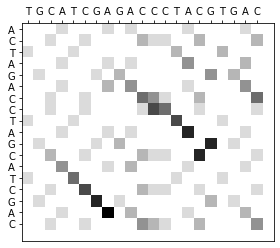

In [65]:
# test - 1
#seq1, seq2, match, mismatch, gap_cost
matrix_grid("ACTAGACCTAGCATCGAC", "TGCATCGAGACCCTACGTGAC", 1, 1, 1)
plt.show()

Match score: 7
Match sequences: 
 sequence 1 = GCATCGA 
 sequence 2 = GCATCGA


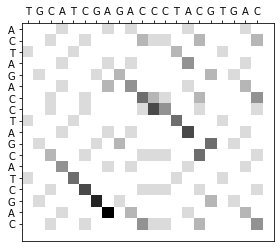

In [66]:
# test - 2
#seq1, seq2, match, mismatch, gap_cost
matrix_grid("ACTAGACCTAGCATCGAC", "TGCATCGAGACCCTACGTGAC", 1, 1, 2)
plt.show()

Match score: 14
Match sequences: 
 sequence 1 = GCATCGA 
 sequence 2 = GCATCGA


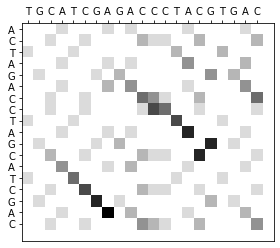

In [67]:
# test - 3
#seq1, seq2, match, mismatch, gap_cost
matrix_grid("ACTAGACCTAGCATCGAC", "TGCATCGAGACCCTACGTGAC", 2, 2, 2)
plt.show()

Match score: 11
Match sequences: 
 sequence 1 = GTGCCTAAGGTA 
 sequence 2 = GTGCCT-AGGTA


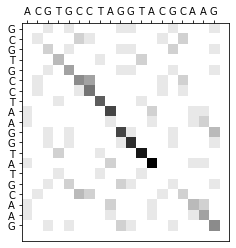

In [68]:
# test - different sequence
#seq1, seq2, match, mismatch, gap_cost
matrix_grid("GCGTGCCTAAGGTATGCAAG", "ACGTGCCTAGGTACGCAAG", 1, 1, 1)
plt.show()

Match score: 10
Match sequences: 
 sequence 1 = TGCCTAAGGTA 
 sequence 2 = TGCCT-AGGTA


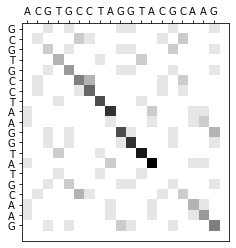

In [70]:
# test - different sequence - 2
#seq1, seq2, match, mismatch, gap_cost
matrix_grid("GCGTGCCTAAGGTATGCAAG", "ACGTGCCTAGGTACGCAAG", 1, 1, 2)
plt.show()